In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Coleta de dados de ativos via Yahoo Finanças
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    returns = data.pct_change().dropna()
    return returns

In [4]:
# Função objetivo para maximizar o retorno esperado
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return returns, risk

In [5]:
# Função para minimizar (negativa do Sharpe Ratio)
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_returns, p_risk = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_risk


In [6]:
# Função de restrição (total dos pesos igual a 1)
def check_sum(weights):
    return np.sum(weights) - 1


In [7]:
# Função para realizar a otimização da carteira
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': check_sum})
    bounds = tuple((0, 1) for _ in range(num_assets))
    result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets], args=args, 
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [8]:
# Visualização dos resultados
def plot_efficient_frontier(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    results = np.zeros((3, num_assets))
    for i in range(num_assets):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        portfolio_return, portfolio_risk = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0, i] = portfolio_risk
        results[1, i] = portfolio_return
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_risk

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.title('Fronteira Eficiente')
    plt.xlabel('Risco (Desvio Padrão)')
    plt.ylabel('Retorno Esperado')
    plt.show()

[*********************100%***********************]  5 of 5 completed


Pesos Ótimos da Carteira:  [0.28958279 0.         0.         0.         0.71041721]
Retorno Esperado: 0.61, Risco: 0.58


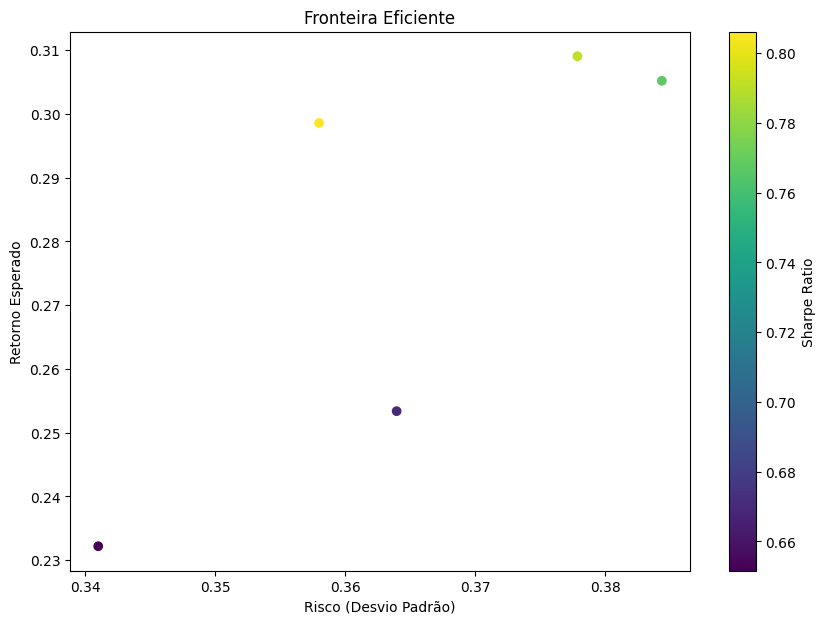

In [9]:
# Exemplo de uso
if __name__ == "__main__":
    # Defina os parâmetros
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
    start_date = '2020-01-01'
    end_date = '2023-01-01'

    # Coleta dos dados e cálculo de retornos
    returns = get_data(tickers, start_date, end_date)
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    # Otimização da carteira
    optimized_results = optimize_portfolio(mean_returns, cov_matrix)

    # Exibição dos resultados da otimização
    print("Pesos Ótimos da Carteira: ", optimized_results.x)
    ret, risk = portfolio_performance(optimized_results.x, mean_returns, cov_matrix)
    print(f"Retorno Esperado: {ret:.2f}, Risco: {risk:.2f}")

    # Visualização da Fronteira Eficiente
    plot_efficient_frontier(mean_returns, cov_matrix)

## RESULTADOS
Descrição dos Resultados
Pesos Ótimos da Carteira: Os pesos ótimos indicam a porcentagem de cada ativo na carteira otimizada. No seu resultado, temos:

AAPL: 28.96%

MSFT: 0%

GOOGL: 0%

AMZN: 0%

TSLA: 71.04%

Isso significa que a carteira otimizada sugere investir uma grande proporção em TSLA e uma quantidade significativa em AAPL, ignorando os outros ativos para maximizar o retorno esperado com o menor risco possível.

Retorno Esperado:

Retorno Esperado: 0.61 (ou 61% anualizado). Este é o retorno médio que você pode esperar obter anualmente com a carteira otimizada.

Risco:

Risco: 0.58 (ou 58% anualizado). Este é o desvio padrão dos retornos da carteira, representando a volatilidade anualizada.